In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
import datetime
now = datetime.datetime.now()
print (now)
now.strftime("%Y-%m-%d %H:%M")

2018-08-30 21:18:26.278243


'2018-08-30 21:18'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    coordinates = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = coordinates.city_name
    #print (city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    #print (coordinates.country_code)

# Print the city count to confirm sufficient count
len(cities)

631

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
#print (url)

cityError = "City not found!"
temperatures = []
humidities = []
cloudinesses = []
windSpeeds = []
latitudes = []
longitudes = []
countries = []
cityNames = []
dates = []

print("Beginning Data Retrieval")
print("------------------------------------------------------")

i = -1 #since we want the index to start at 0 when iterating through the lat_lngs list
j = 0
for city in cities[:]: #https://stackoverflow.com/questions/7210578/why-does-list-remove-not-behave-as-one-might-expect
    i = i + 1
    if j < 500:
        cityURL = url + "&q=" + city
        #print (cityURL)
        cityWeatherResponse = requests.get(cityURL).json()
        #print(json.dumps(cityWeatherResponse, indent=4, sort_keys=True))
        #print (cityWeatherResponse)
        try:
            cityTemperature = cityWeatherResponse['main']['temp']
            cityHumidity = cityWeatherResponse['main']['humidity']
            #cityCloudiness = cityWeatherResponse['weather'][0]['description']
            cityCloudiness = cityWeatherResponse['clouds']['all']
            cityWindSpeed = cityWeatherResponse['wind']['speed']
            cityName = cityWeatherResponse['name']
            date = cityWeatherResponse['dt']
            #print(f"City: {cityName}")
            #print(f"Temperature: {cityTemperature}")
            #print(f"Humidity: {cityHumidity}")
            #print(f"Cloudiness: {cityCloudiness}")
            #print(f"Wind speed: {cityWindSpeed}")
            #print(f"Date: {date}")
            #print(f"")
            #print("##################")
            temperatures.append(cityTemperature)
            humidities.append(cityHumidity)
            cloudinesses.append(cityCloudiness)
            windSpeeds.append(cityWindSpeed)

            latitude = cityWeatherResponse['coord']['lat']
            latitudes.append(latitude)
            longitude = cityWeatherResponse['coord']['lon']
            longitudes.append(longitude)
            #latitude = lats[i]
            #latitudes.append(latitude)
            #longitude = lngs[i]
            #longitudes.append(longitude)
            
            cityNames.append(cityName)
            dates.append(date)
            
            #cities.append(city) #use the .upper() method to capitalize the first letters
            #print(latitudes)
            country = citipy.nearest_city(latitude, longitude).country_code 
            countries.append(country) #use the .upper() method to capitalize the first letters
            j = j + 1
            #print (f"Processing results for city {i+1} | city")
            #print (f"Data available for: {city}")
        except:
            pass
            #print(cityError)
            #print (f"Processing results for city {i+1} | city")
            #print (f"Data unavailable for: {city}")
            #cities.remove(city)
    #elif j == 500:
     #   cities.remove(city) #to remove the city from the list if we already have 500 cities; if we don't do this, we stop
    #collecting parameters after 500 cities but the cities past the 500 index remain in the "cities" list

print(len(temperatures))
print(len(humidities))
print(len(cloudinesses))
print(len(windSpeeds))
print(len(latitudes))
print(len(longitudes))
print(len(countries))
print(len(cityNames))
print(len(dates))

print("------------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------------")

Beginning Data Retrieval
------------------------------------------------------
500
500
500
500
500
500
500
500
500
------------------------------------------------------
Data Retrieval Complete
------------------------------------------------------


In [5]:
numberTemperatures = len(temperatures)
numberHumidities = len(humidities)
numberCloudinesses =  len(cloudinesses)
numberWindSpeeds = len(windSpeeds)
#print(cities)
#print(cloudinesses)
#countList = []
#countDF = pd.DataFrame({"Temperature":numberTemperatures, "Humidity":numberHumidities, "Cloudiness":numberCloudinesses, "Wind Speed":numberWindSpeeds}, index=[0])
'''
countDF = pd.DataFrame([{"Temperature":numberTemperatures},
                        {"Humidity":numberHumidities},
                        {"Cloudiness":numberCloudinesses},
                        {"Wind Speed":numberWindSpeeds}
                       ])
'''
#countDF = pd.DataFrame({["Temperature", "Humidity", "Cloudiness", "Wind Speed"]:
#                        [numberTemperatures, numberHumidities, numberCloudinesses, numberWindSpeeds]})
#print (countDF)
#df = pd.DataFrame({"City":cities, "Cloudiness":cloudinesses, "Country":countries,
 #                  "Date":now, "Humidity":humidities, "Lat":latitudes,
  #                 "Lng":longitudes, "Max Temp":temperatures, "Wind Speed":windSpeeds
#})
#df = df.reset_index(drop = True)
weatherDataDictionary = {"City" : cityNames,
                         "Cloudiness" : cloudinesses,
                         "Country": countries,
                         "Date": dates,
                         "Humidity": humidities,
                         "Lat": latitudes,
                         "Lng": longitudes,
                         "Max Temp" : temperatures,
                         "Wind Speed" : windSpeeds
    
}
weatherDF = pd.DataFrame(weatherDataDictionary)
weatherDF.to_csv("Weather_of_500_Cities.csv")
#print (df)

weatherDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lincoln,1,us,1535686500,95,40.80,-96.67,72.63,5.82
1,Torbay,90,ca,1535684400,100,47.66,-52.73,60.80,12.75
2,Punta Arenas,20,cl,1535688000,86,-53.16,-70.91,33.80,14.99
3,Shingu,75,jp,1535684400,83,33.72,135.99,84.20,4.70
4,Bossangoa,80,cf,1535689111,96,6.50,17.45,69.20,2.62


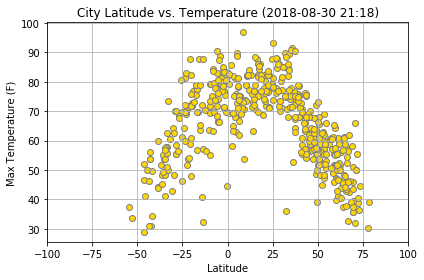

In [6]:
#temperatureLatitudePlot = 
plt.scatter(weatherDF["Lat"], weatherDF["Max Temp"], marker = 'o', color="Gold", alpha=1, edgecolor="gray", linewidth=1) #s=driversPerCity*7,
plt.title(f"City Latitude vs. Temperature ({now.strftime('%Y-%m-%d %H:%M')})")
plt.xlabel("Latitude")
plt.xlim(-100, 100)
plt.ylabel("Max Temperature (F)")
#plt.text(42, 42, s="Note: Circle size correlates with driver count per city.")
plt.grid(True)
#plt.legend( handles=[urbanPlot, suburbanPlot, ruralPlot], loc="best")
plt.savefig("latitudeVStemperature.png", dpi = 1000, linewidth=1)
plt.tight_layout()
#################################################################################################################
plt.show()

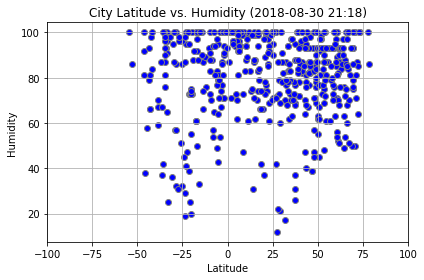

In [7]:
humidityLatitudePlot = plt.scatter(latitudes, humidities, marker = 'o', color="Blue", alpha=1, edgecolor="gray", linewidth=1) #s=driversPerCity*7,
plt.title(f"City Latitude vs. Humidity ({now.strftime('%Y-%m-%d %H:%M')})")
plt.xlabel("Latitude")
plt.xlim(-100, 100)
plt.ylabel("Humidity")
#plt.text(42, 42, s="Note: Circle size correlates with driver count per city.")
plt.grid(True)
#plt.legend( handles=[urbanPlot, suburbanPlot, ruralPlot], loc="best")
plt.savefig("latitudeVShumidity.png", dpi = 1000, linewidth=1)
plt.tight_layout()
#################################################################################################################
plt.show()

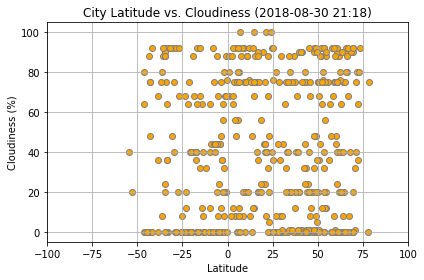

In [8]:
cloudinessLatitudePlot = plt.scatter(latitudes, cloudinesses, marker = 'o', color="Orange", alpha=1, edgecolor="gray", label="Urban", linewidth=1) #s=driversPerCity*7,
plt.title(f"City Latitude vs. Cloudiness ({now.strftime('%Y-%m-%d %H:%M')})")
plt.xlabel("Latitude")
plt.xlim(-100, 100)
plt.ylabel("Cloudiness (%)")
#plt.text(42, 42, s="Note: Circle size correlates with driver count per city.")
plt.grid()
#plt.legend( handles=[urbanPlot, suburbanPlot, ruralPlot], loc="best")
plt.savefig("latitudeVScloudiness.png", dpi = 1000, linewidth=1)
plt.tight_layout()
#################################################################################################################
plt.show()

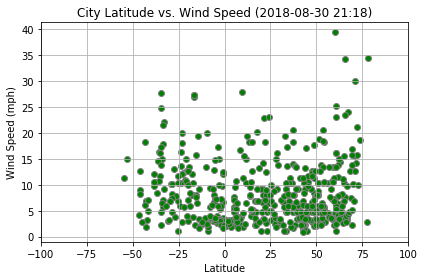

In [9]:
windSpeedLatitudePlot = plt.scatter(latitudes, windSpeeds, color="Green", alpha=1, edgecolor="gray", label="Urban", linewidth=1) #s=driversPerCity*7,
plt.title(f"City Latitude vs. Wind Speed ({now.strftime('%Y-%m-%d %H:%M')})")
plt.xlabel("Latitude")
plt.xlim(-100, 100)
plt.ylabel("Wind Speed (mph)")
#plt.text(42, 42, s="Note: Circle size correlates with driver count per city.")
plt.grid()
#plt.legend( handles=[urbanPlot, suburbanPlot, ruralPlot], loc="best")
plt.savefig("latitudeVSwindspeeds.png", dpi = 1000, linewidth=1)
plt.tight_layout()
#################################################################################################################
plt.show()